# Heart Disease Prediction

This notebook explores a dataset with demographic information related to heart disease and different machine learning algorithms in order to create a prediction model.
This is a part of the course unit "Artificial Intelligence" of the Master in Informatics and Computing Engineering at FEUP.

#### Authors

| Name | Email |
|-----|----|
| José Luís Cunha Rodrigues | up202008462@fe.up.pt |
| Martim Raúl da Rocha Henriques | up202004421@fe.up.pt |
| Tiago Filipe Magalhães Barbosa | up202004926@fe.up.pt |

#### Imports

Firstly, we start by importing the necessay dependencies:

In [55]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm


#### Analysis of the data

The dataset is composed of 18 features, most of which are related to the health condition of each individual. The target variable is the presence of heart disease in the patient, which is a binary variable. Most features are binary and some are continuos. The dataset is composed of 319795 entries.

There are no null values in the dataset. In the following cells, we will expose a summary of the dataset.

In [56]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("heart_disease.csv")

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [58]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

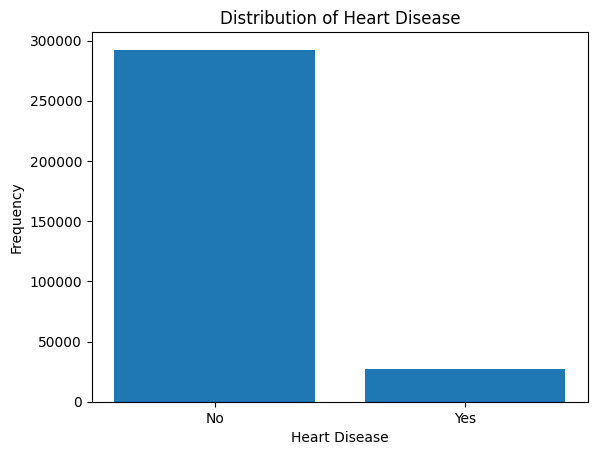

In [59]:
counts = df["HeartDisease"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.title("Distribution of Heart Disease")
plt.show()

Upon first analysis, we can already see that there are no null values, which will make our job easier.

We can see that the data is imbalanced. Most of the patients analyzed were healthy. This means that we may obtain skewed results, so it is something to deal with later on.

#### Data preprocessing

The column for physical health and mental health have a lot of zeros (>65%) which probably indicates lack of data so you opted to don't use these parameters.

In [60]:
new_df = df.copy()  # create a copy of the original dataframe

physicalHealth = new_df['PhysicalHealth'].describe()
print(physicalHealth)

# Calculate the percentage of values equal to 0
percentage_zero = (new_df['PhysicalHealth'] == 0).mean() * 100

# Print the result
print(f"The percentage of Physical Health values equal to 0: {percentage_zero}%")

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64
The percentage of Physical Health values equal to 0: 70.85445363435952%


In [61]:
mentalHealth = new_df['MentalHealth'].describe()
print(mentalHealth)

# Calculate the percentage of values equal to 0
percentage_zero = (new_df['MentalHealth'] == 0).mean() * 100

# Print the result
print(f"The percentage of Mental Health values equal to 0: {percentage_zero}%")

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64
The percentage of Mental Health values equal to 0: 64.22895917697275%


In [62]:
# drop mental health and physical health columns

#new_df = new_df.drop(['MentalHealth', 'PhysicalHealth'], axis=1)

new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


We must binarize the Sex collumn because the values are not ordinal:

In [63]:
# Get the unique race categories
sexes = new_df['Sex'].unique()

# Create new columns for each race category
for sex in sexes:
    new_df[sex] = (new_df['Sex'] == sex)
    
# Drop race column
new_df = new_df.drop("Sex", axis=1)
    
new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male
0,No,16.60,Yes,No,No,3.0,30.0,No,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,True,False
1,No,20.34,No,No,Yes,0.0,0.0,No,80 or older,White,No,Yes,Very good,7.0,No,No,No,True,False
2,No,26.58,Yes,No,No,20.0,30.0,No,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,False,True
3,No,24.21,No,No,No,0.0,0.0,No,75-79,White,No,No,Good,6.0,No,No,Yes,True,False
4,No,23.71,No,No,No,28.0,0.0,Yes,40-44,White,No,Yes,Very good,8.0,No,No,No,True,False


The AgeCategory is Ordinal so we must change it to give meaning to the data. We will be taking the mean of the age so we get a numerical value.

In [64]:
# Define a function to transform the age category into a representative value
def transform_age(row):
    age_range = str(row['AgeCategory']).split('-')
    if (len(age_range) == 1):
      return 80
    age_lower = int(age_range[0])
    age_upper = int(age_range[1])
    age_representative = (age_lower + age_upper) / 2
    return age_representative

# Apply the transformation to every row in the DataFrame
new_df['AgeCategory'] = new_df.apply(transform_age, axis=1)

new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male
0,No,16.60,Yes,No,No,3.0,30.0,No,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes,True,False
1,No,20.34,No,No,Yes,0.0,0.0,No,80.0,White,No,Yes,Very good,7.0,No,No,No,True,False
2,No,26.58,Yes,No,No,20.0,30.0,No,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No,False,True
3,No,24.21,No,No,No,0.0,0.0,No,77.0,White,No,No,Good,6.0,No,No,Yes,True,False
4,No,23.71,No,No,No,28.0,0.0,Yes,42.0,White,No,Yes,Very good,8.0,No,No,No,True,False


We need to binarize the Race collumn so we can use it in the machine learning algortihms

In [65]:
# Get the unique race categories
races = new_df['Race'].unique()

# Create new columns for each race category
for race in races:
    new_df[race] = (new_df['Race'] == race)
    
# Drop race column
new_df = new_df.drop("Race", axis=1)
    
new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,No,16.60,Yes,No,No,3.0,30.0,No,57.0,Yes,Yes,Very good,5.0,Yes,No,Yes,True,False,True,False,False,False,False,False
1,No,20.34,No,No,Yes,0.0,0.0,No,80.0,No,Yes,Very good,7.0,No,No,No,True,False,True,False,False,False,False,False
2,No,26.58,Yes,No,No,20.0,30.0,No,67.0,Yes,Yes,Fair,8.0,Yes,No,No,False,True,True,False,False,False,False,False
3,No,24.21,No,No,No,0.0,0.0,No,77.0,No,No,Good,6.0,No,No,Yes,True,False,True,False,False,False,False,False
4,No,23.71,No,No,No,28.0,0.0,Yes,42.0,No,Yes,Very good,8.0,No,No,No,True,False,True,False,False,False,False,False


The genHealth collumn is Ordinal so we can do label encoding to transform the categories into something ordered:

In [66]:
# Define the mapping of categories to numerical labels
label_mapping = {'Excellent': 10, 'Very good': 8, 'Good':6 , 'Fair': 3, 'Poor': 0}

# Apply label encoding to the column
new_df['GenHealth'] = new_df['GenHealth'].map(label_mapping)

new_df.head()



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,No,16.60,Yes,No,No,3.0,30.0,No,57.0,Yes,Yes,8,5.0,Yes,No,Yes,True,False,True,False,False,False,False,False
1,No,20.34,No,No,Yes,0.0,0.0,No,80.0,No,Yes,8,7.0,No,No,No,True,False,True,False,False,False,False,False
2,No,26.58,Yes,No,No,20.0,30.0,No,67.0,Yes,Yes,3,8.0,Yes,No,No,False,True,True,False,False,False,False,False
3,No,24.21,No,No,No,0.0,0.0,No,77.0,No,No,6,6.0,No,No,Yes,True,False,True,False,False,False,False,False
4,No,23.71,No,No,No,28.0,0.0,Yes,42.0,No,Yes,8,8.0,No,No,No,True,False,True,False,False,False,False,False


 The diabetes collumn like the race collumn should be binarized so you can have a collumn for each possible value:

In [67]:
# Get the unique race categories
diabetes = new_df['Diabetic'].unique()

# Create new columns for each race category
for diabete in diabetes:
    new_df["Diabetes: " + diabete] = (new_df['Diabetic'] == diabete)
    
# Drop race column
new_df = new_df.drop("Diabetic", axis=1)
    
new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Diabetes: Yes,Diabetes: No,"Diabetes: No, borderline diabetes",Diabetes: Yes (during pregnancy)
0,No,16.60,Yes,No,No,3.0,30.0,No,57.0,Yes,8,5.0,Yes,No,Yes,True,False,True,False,False,False,False,False,True,False,False,False
1,No,20.34,No,No,Yes,0.0,0.0,No,80.0,Yes,8,7.0,No,No,No,True,False,True,False,False,False,False,False,False,True,False,False
2,No,26.58,Yes,No,No,20.0,30.0,No,67.0,Yes,3,8.0,Yes,No,No,False,True,True,False,False,False,False,False,True,False,False,False
3,No,24.21,No,No,No,0.0,0.0,No,77.0,No,6,6.0,No,No,Yes,True,False,True,False,False,False,False,False,False,True,False,False
4,No,23.71,No,No,No,28.0,0.0,Yes,42.0,Yes,8,8.0,No,No,No,True,False,True,False,False,False,False,False,False,True,False,False


Now for each Yes and No collumn lets transform it into True and False for the machine learning algorithms

In [68]:
# We need to change the column that have Yes and No to True and False respectively

new_df['HeartDisease'] = new_df['HeartDisease'].replace({'Yes': True, 'No': False})
new_df['Smoking'] = new_df['Smoking'].replace({'Yes': True, 'No': False})
new_df['AlcoholDrinking'] = new_df['AlcoholDrinking'].replace({'Yes': True, 'No': False})
new_df['Stroke'] = new_df['Stroke'].replace({'Yes': True, 'No': False})
new_df['DiffWalking'] = new_df['DiffWalking'].replace({'Yes': True, 'No': False})
new_df['PhysicalActivity'] = new_df['PhysicalActivity'].replace({'Yes': True, 'No': False})
new_df['Asthma'] = new_df['Asthma'].replace({'Yes': True, 'No': False})
new_df['KidneyDisease'] = new_df['KidneyDisease'].replace({'Yes': True, 'No': False})
new_df['SkinCancer'] = new_df['SkinCancer'].replace({'Yes': True, 'No': False})

new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Diabetes: Yes,Diabetes: No,"Diabetes: No, borderline diabetes",Diabetes: Yes (during pregnancy)
0,False,16.60,True,False,False,3.0,30.0,False,57.0,True,8,5.0,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False
1,False,20.34,False,False,True,0.0,0.0,False,80.0,True,8,7.0,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False
2,False,26.58,True,False,False,20.0,30.0,False,67.0,True,3,8.0,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False
3,False,24.21,False,False,False,0.0,0.0,False,77.0,False,6,6.0,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False
4,False,23.71,False,False,False,28.0,0.0,True,42.0,True,8,8.0,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False


So the processed dataframe has the following collumns:

In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   HeartDisease                       319795 non-null  bool   
 1   BMI                                319795 non-null  float64
 2   Smoking                            319795 non-null  bool   
 3   AlcoholDrinking                    319795 non-null  bool   
 4   Stroke                             319795 non-null  bool   
 5   PhysicalHealth                     319795 non-null  float64
 6   MentalHealth                       319795 non-null  float64
 7   DiffWalking                        319795 non-null  bool   
 8   AgeCategory                        319795 non-null  float64
 9   PhysicalActivity                   319795 non-null  bool   
 10  GenHealth                          319795 non-null  int64  
 11  SleepTime                          3197

#### Correlation Matrix

In order to understand the correlation between the features, we will plot a correlation matrix. This will help us understand which features are more important to the prediction of heart disease.

<Axes: >

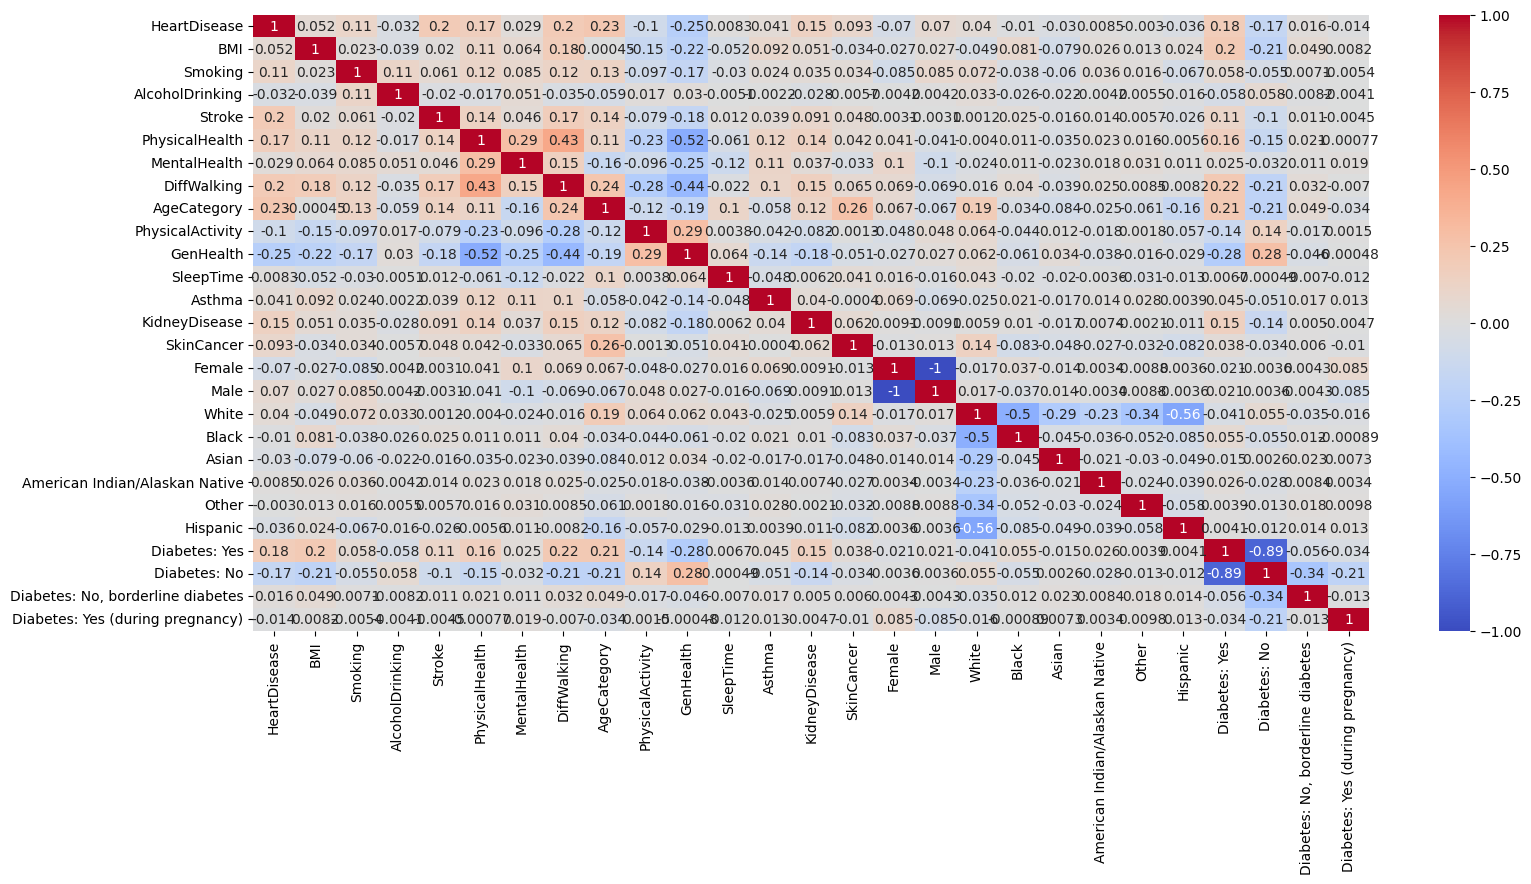

In [70]:
plt.figure(figsize=(18,8))
correlation = new_df.corr()
sb.heatmap(correlation,annot=True,cmap='coolwarm')

Taking a look at the matrix we observe that the variables more likely to affect Heart Disease are:
- Stroke
- DiffWalking
- AgeCategory
- Diabetic
- KidneyDisease

So now, we will take a closer look at how these variables affect the target variable.

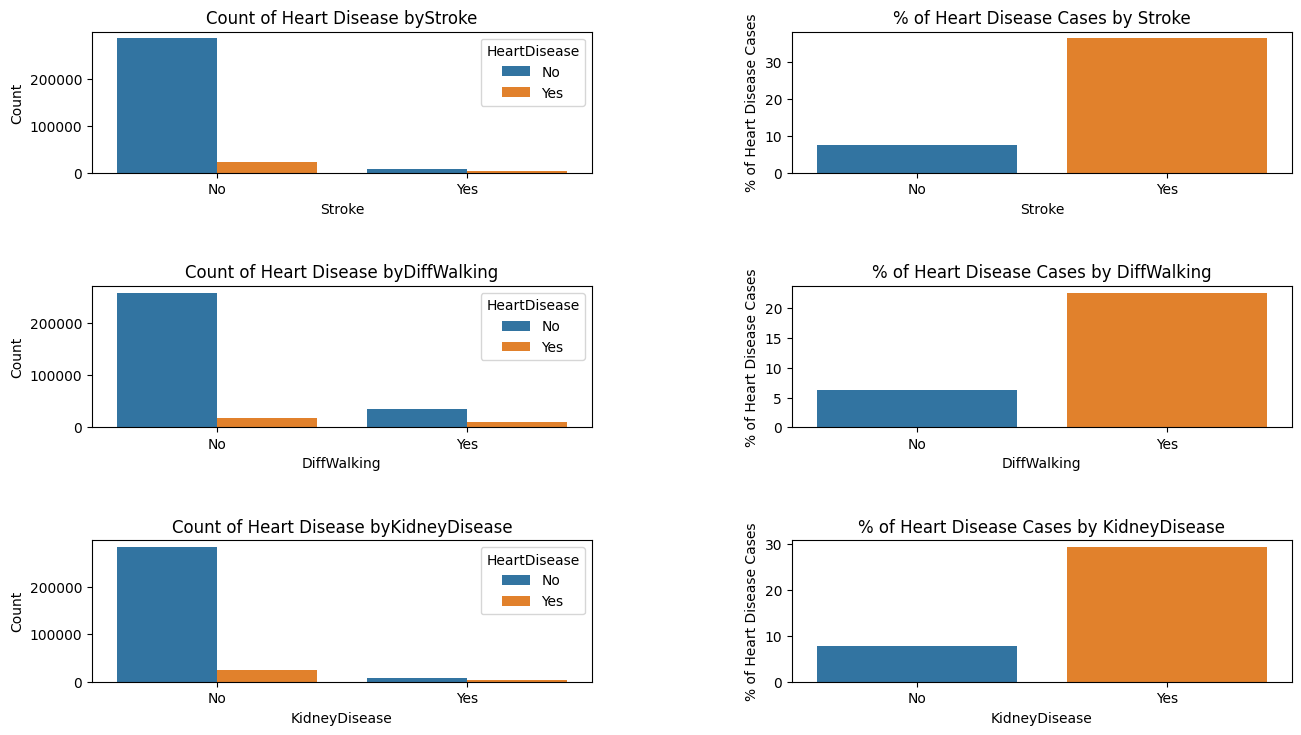

In [125]:
def plotRelation(col, ax1, ax2):
    # Create a figure with two subplots side by side

    # count plot
    sb.countplot(x=col, hue='HeartDisease', data=df, ax=ax1)
    ax1.set_title('Count of Heart Disease by' + col)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')

    ## percentage of people with heart disease by stroke
    perc_stroke = df.groupby(col)['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

    # Create bar plot
    sb.barplot(x=perc_stroke.index, y=perc_stroke.values, ax=ax2)
    ax2.set_title('% of Heart Disease Cases by ' + col)
    ax2.set_xlabel(col)
    ax2.set_ylabel('% of Heart Disease Cases')


# Create a figure with three subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 5))

# Call the plotRelation function for each column and subplot
plotRelation('Stroke', axes[0, 0], axes[0, 1])
plotRelation('DiffWalking', axes[1, 0], axes[1, 1])
plotRelation('KidneyDisease', axes[2, 0], axes[2, 1])


# Adjust the layout of the subplots
plt.subplots_adjust(top=1.4, bottom=0.1, left=0.1, right=0.9, hspace=0.8, wspace=0.4)

According to the graph above, there is a higher chance of having heart disease if the patient has had a stroke.
We can see that the percentage of people with heart disease that had a stroke was around five times higher than the percentage of people with heart disease that did not have a stroke.

Again, we can state that the more a patient has difficulty walking, the more likely it is that he has heart disease. 
The percentage of people with heart disease that have difficulty walking is around 5 times higher than the percentage of people with heart disease that do not have difficulty walking.

As shown in the previous graph patients with kidney disease have a higher tendency to suffer from heart disease.
In this case, almost 30% of the patients with kidney disease also have heart disease. 
On the other hand, only around 7% of the patients without kidney disease have heart disease.

#### Age Category

Text(0, 0.5, 'Percentage')

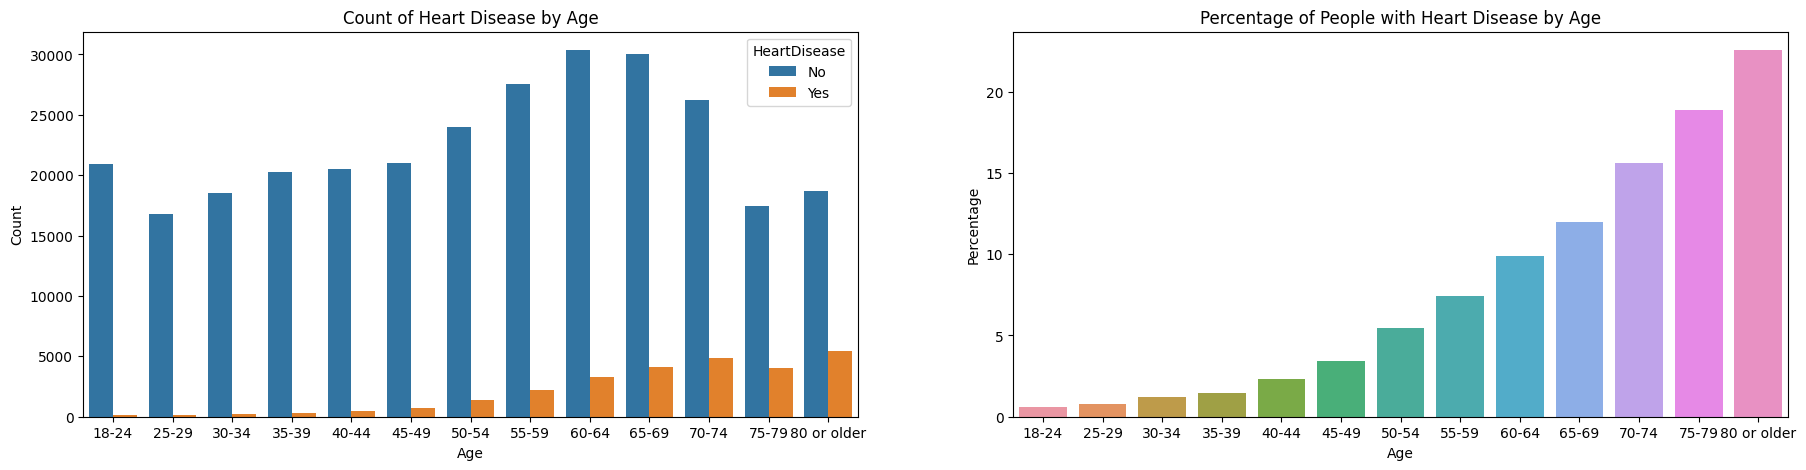

In [19]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 5))

# create a list of the age categories in the desired order
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# create a categorical variable with the desired order
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)

# plot count of heart disease by age category
sb.countplot(x='AgeCategory', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

# plot percentage of people with heart disease by age category
age_df = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
age_df = age_df[age_df['HeartDisease']=='Yes']
sb.barplot(x='AgeCategory', y='Percentage', data=age_df, ax=ax2)
ax2.set_title('Percentage of People with Heart Disease by Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Percentage')


As we can see on the above graph, the percentage of patients with heart disease consistently increases with age. 
It's also noticeable that the data is fairly distributed across all ages.

#### Diabetic

Text(0, 0.5, 'Percentage of Heart Disease Cases')

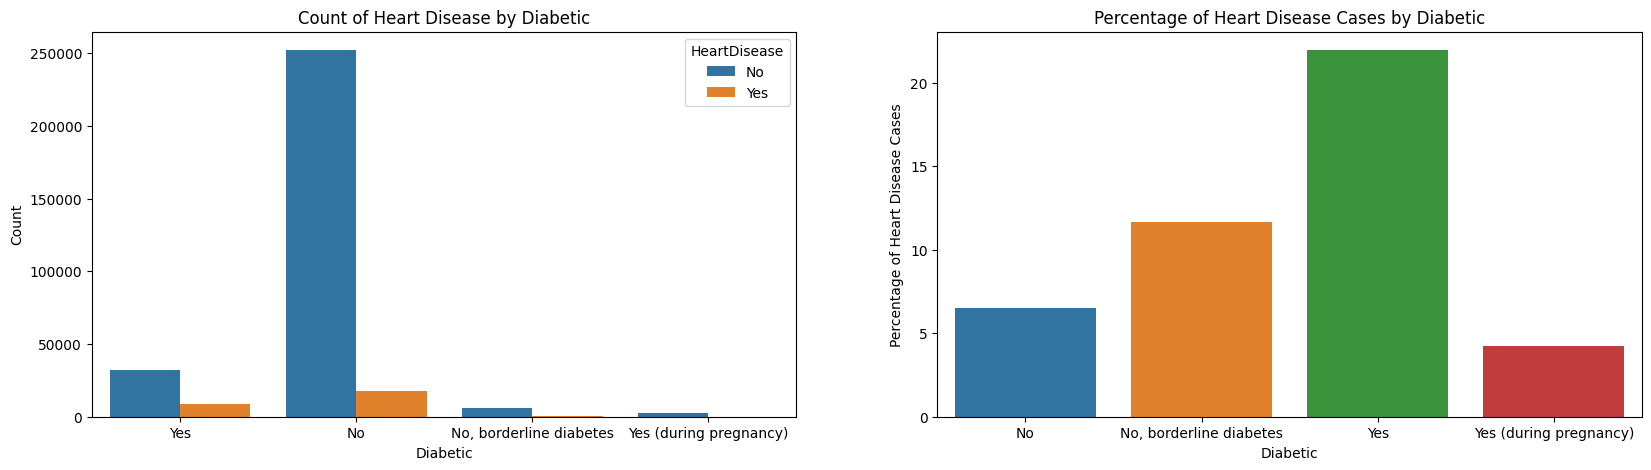

In [20]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sb.countplot(x='Diabetic', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by Diabetic')
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('Count')

# create a grouped dataframe to calculate percentage
perc_stroke = df.groupby('Diabetic')['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

# Create bar plot
sb.barplot(x=perc_stroke.index, y=perc_stroke.values, ax=ax2)
ax2.set_title('Percentage of Heart Disease Cases by Diabetic')
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Percentage of Heart Disease Cases')

In [21]:
# get the average age of diabetic during pregnancy
avg_age = df[df['Diabetic']=='Yes (during pregnancy)']
#avg_age["ageLower"] = avg_age["AgeCategory"].str.split("-").str[0].astype(int)
#avg_age.groupby('AgeCategory')['ageLower'].mean()

People with diabetes have a higher tendency to suffer from heart disease.


According to the graph, for patients with gestational diabetes (i.e. during pregnancy) leads to a lower percentage of heart disease.
Nevertheless, this can be due to a couple of reasons:
- The data is not representative enough
- This condition is only present during a limited period of a person's life
- The patients measured are expected to be younger than the average age of people with heart disease

In [ ]:
# perform feature selection

# create a dataframe with all the independent variables
X = new_df.drop('HeartDisease', axis=1)


In [71]:
X = new_df.drop('HeartDisease', axis=1)
y = new_df['HeartDisease']
df_selection = pd.DataFrame(columns=['strategy'] + list(X.columns))

cols = []
for col in X.columns:
    cols.append(abs(new_df[col].corr(new_df['HeartDisease'])) >= 0.1)

df_selection.loc[0, :] = ['Correlation'] + cols

[0.00328817 0.03416048 0.0007305  0.0119767  0.0127356  0.00198474
 0.01823968 0.03713575 0.06366667 0.04750064 0.02023573 0.00446796
 0.00701099 0.00518599 0.05188878 0.04164946 0.057501   0.0019075
 0.00011114 0.         0.00109656 0.00168027 0.01459485 0.06916172
 0.00024772 0.00030795]


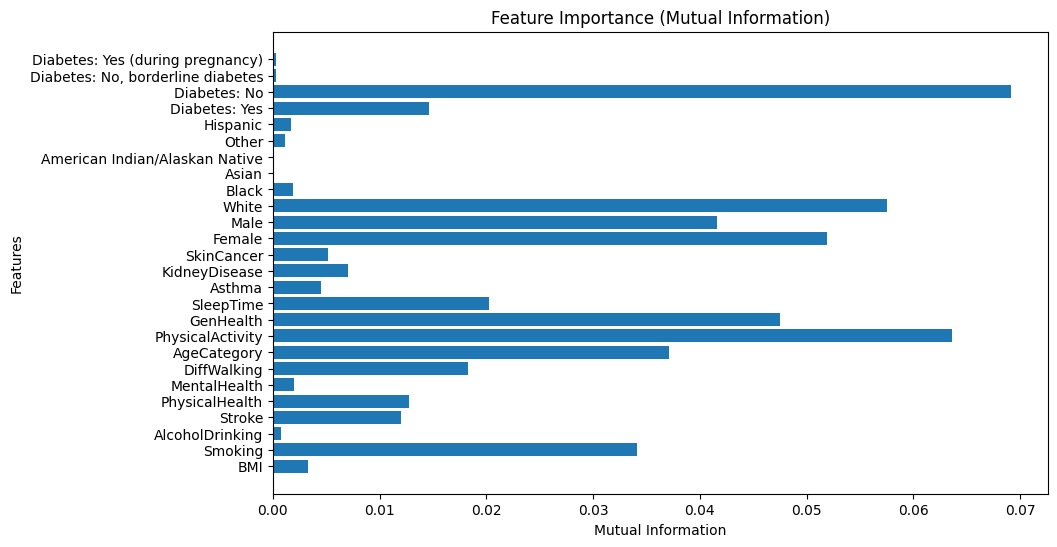

In [36]:
X = new_df.drop('HeartDisease', axis=1)
y = new_df['HeartDisease']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Plot feature importance (Mutual Information)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mi_scores)
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Feature Importance (Mutual Information)')
plt.show()

In [72]:
cols = []
# get the cols from mi_scores with score >= 0.1
for col in X.columns:
    cols.append(mi_scores[X.columns.get_loc(col)] >= 0.03)

df_selection.loc[1, :] = ['Mutual Information'] + cols

df_selection

,strategy,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Diabetes: Yes,Diabetes: No,"Diabetes: No, borderline diabetes",Diabetes: Yes (during pregnancy)
0,Correlation,False,True,False,True,True,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
1,Mutual Information,False,True,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False


In [27]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif

X = new_df.drop('HeartDisease', axis=1)
y = new_df['HeartDisease']

model = DecisionTreeClassifier()

# Create an instance of RFE with the model and the desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE to your data
rfe.fit(X, y)

# Get the selected features
selected_features = rfe.transform(X)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

print("Selected feature names with RFE:")
print(selected_feature_names)



#new_df.info()

Selected feature names with RFE:
Index(['BMI', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking',
       'AgeCategory', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma'],
      dtype='object')
Columns to drop: ['BMI', 'AlcoholDrinking', 'MentalHealth', 'SleepTime', 'Asthma', 'SkinCancer', 'Female', 'Male', 'White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic', 'Diabetes: No, borderline diabetes', 'Diabetes: Yes (during pregnancy)']


In [73]:
cols = []
# get the cols from mi_scores with score >= 0.1
for col in X.columns:
    cols.append(col in selected_feature_names)

df_selection.loc[2, :] = ['RFE'] + cols

df_selection

,strategy,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Diabetes: Yes,Diabetes: No,"Diabetes: No, borderline diabetes",Diabetes: Yes (during pregnancy)
0,Correlation,False,True,False,True,True,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
1,Mutual Information,False,True,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False
2,RFE,True,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
selection = df_selection.loc[:, (df_selection == True).sum() >= 2].columns
#remove sum from selection
selection = selection[:-1]
selection = pd.Index(["HeartDisease"]).append(selection)

print(selection.values)
new_df = new_df[selection]
new_df.head()

['HeartDisease' 'Smoking' 'Stroke' 'PhysicalHealth' 'DiffWalking'
 'AgeCategory' 'PhysicalActivity' 'GenHealth']


,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth
0,False,True,False,3.0,False,57.0,True,8
1,False,False,True,0.0,False,80.0,True,8
2,False,True,False,20.0,False,67.0,True,3
3,False,False,False,0.0,False,77.0,False,6
4,False,False,False,28.0,True,42.0,True,8


## Classification

Now, we can start the classification process. We will start by splitting the dataset into training and testing sets. The size of the testing set will be 20% of the total dataset.

Firstly, let's define general use functions:

In [88]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

def balance():
    X = new_df.drop('HeartDisease', axis=1)
    y = new_df['HeartDisease']

    # Identify the indices of majority and minority class instances
    majority_indices = y[y == False].index
    minority_indices = y[y == True].index

    desired_majority_size = len(minority_indices)  # Set to the same size as the minority class

    # Determine the number of instances to keep from the majority class
    desired_majority_size = len(minority_indices)  # Set to the same size as the minority class

    # Randomly select instances from the majority class
    undersampled_majority_indices = resample(
        majority_indices,
        replace=False,  # Without replacement
        n_samples=desired_majority_size,  # Number of instances to keep
        random_state=42
    )

    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)

    # Combine the undersampled majority class instances with the minority class instances
    undersampled_indices = np.concatenate((undersampled_majority_indices, minority_indices))
    X_balanced = X.loc[undersampled_indices]
    y_balanced = y.loc[undersampled_indices]
    return (X_balanced, y_balanced)
    

def runModel(model, analysis=True):
    results = pd.DataFrame(columns=['strategy', 'accuracy', 'precision', 'recall', 'f1'])
    X = new_df.drop('HeartDisease', axis=1)
    y = new_df['HeartDisease']

    # Convert categorical variables into numerical using one-hot encoding
    X = pd.get_dummies(X)

    if analysis:
        # Run the model without balancing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        _y_pred, accuracy, precision, recall, f1 = getMetrics(model, X_test, y_test)
        results.loc[0, :] = ['unbalanced', accuracy, precision, recall, f1]

        # Run the model with oversampling
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        model.fit(X_train, y_train)
        _y_pred, accuracy, precision, recall, f1 = getMetrics(model, X_test, y_test)
        results.loc[1, :] = ['oversampling', accuracy, precision, recall, f1]

    # Run the model with undersampling
    X, y = balance()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    _y_pred, accuracy, precision, recall, f1 = getMetrics(model, X_test, y_test)
    results.loc[2, :] = ['undersampling', accuracy, precision, recall, f1]

    if analysis: 
        display(results)
        analyze(model, X_test, y_test)

    return accuracy

def runModelRepeatedly(model):
    model_accuracies = []
    X, y = balance()

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Convert categorical variables into numerical using one-hot encoding
        X = pd.get_dummies(X)

        model.fit(X_train, y_train)

        # Predict the target variable for the testing data
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        model_accuracies.append(accuracy)

    plt.hist(model_accuracies)

def getMetrics(model, testing_inputs, testing_classes):
    model.score(testing_inputs, testing_classes)

    y_pred = model.predict(testing_inputs)

    accuracy = accuracy_score(testing_classes, y_pred)
    precision = precision_score(testing_classes, y_pred)
    recall = recall_score(testing_classes, y_pred)
    f1 = f1_score(testing_classes, y_pred)
    return (y_pred, accuracy, precision, recall, f1)

def analyze(model, testing_inputs, testing_classes):
    y_pred, accuracy, precision, recall, f1 = getMetrics(model, testing_inputs, testing_classes)


    cm = confusion_matrix(testing_classes, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(5, 5))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix (undersampling)')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


#### Decision Tree

,strategy,accuracy,precision,recall,f1
0,unbalanced,0.910536,0.429957,0.071352,0.122393
1,oversampling,0.733079,0.200418,0.686695,0.310278
2,undersampling,0.727215,0.729867,0.727883,0.728874


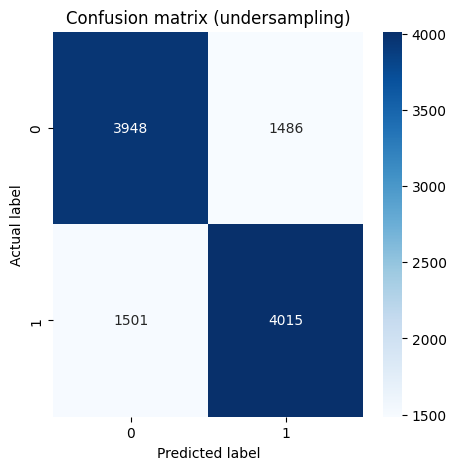

In [89]:
accuracy = runModel(DecisionTreeClassifier(random_state=42))

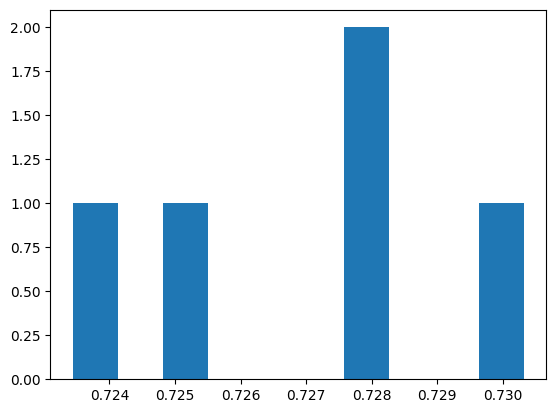

In [90]:
runModelRepeatedly(DecisionTreeClassifier())

#### Support Vector Machines (SVM)

In [172]:
clf = svm.SVC(kernel='linear')

# commenting out because it takes a long time to run
# runModel(clf)
# print("Accuracy: " + str(accuracy))

/home/luis/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# commenting out because it takes a long time to run
# runModelRepeatedly(clf)

#### K-Neighbours Classifier

,strategy,accuracy,precision,recall,f1
0,unbalanced,0.905611,0.351369,0.094063,0.148399
1,oversampling,0.897466,0.328602,0.165594,0.220214
2,undersampling,0.720913,0.7198,0.730239,0.724982


Accuracy: 0.7209132420091324
Precision: 0.7197998570407433
Recall: 0.7302393038433648
F1 score: 0.7249820014398848


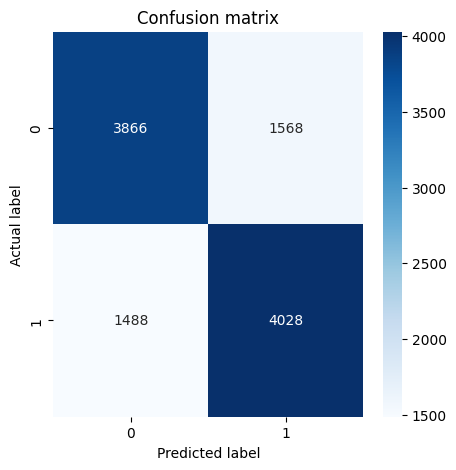

Accuracy: 0.7209132420091324


In [170]:
clf = KNeighborsClassifier(n_neighbors=5)
accuracy = runModel(clf)
print("Accuracy: " + str(accuracy))

In [91]:
runModelRepeatedly(clf)

NameError: name 'clf' is not defined

Text(0, 0.5, 'Testing Accuracy')

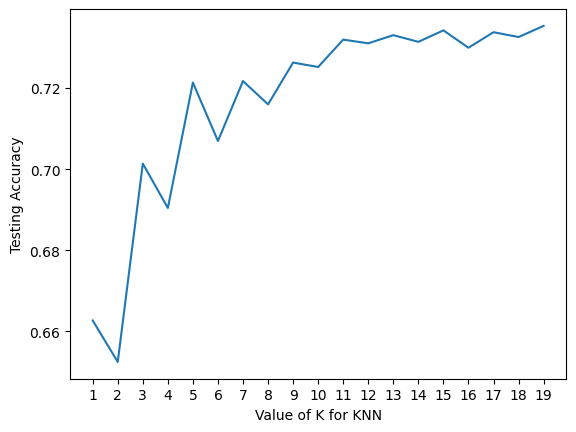

In [92]:
scores = []
n = 20

for k in range (1, n):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores.append(runModel(clf, False))

# plot the relationship between K and testing accuracy
plt.plot(range(1, n), scores)
plt.xticks(np.arange(1, n, 1))
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [94]:
# get max and its index
max_accuracy = np.max(scores)
max_accuracy_index = scores.index(max_accuracy)
print("Max accuracy: " + str(max_accuracy), "at k = " + str(max_accuracy_index + 1))

Max accuracy: 0.7353424657534247 at k = 19


We tested k-NN algorithm with different values of k. The best results were obtained with larger values of k, which is expected since the data is imbalanced. The best value obtained as around 0.74 with 19 neighbours. After that, the accuracy starts to stabilize with no significant improvement.

#### Random Forest

,strategy,accuracy,precision,recall,f1
0,unbalanced,0.903391,0.345932,0.117847,0.175804
1,oversampling,0.8828,0.303062,0.261981,0.281028
2,undersampling,0.747123,0.737589,0.773024,0.754891


Accuracy: 0.7471232876712329
Precision: 0.7375886524822695
Recall: 0.7730239303843365
F1 score: 0.7548906789413118


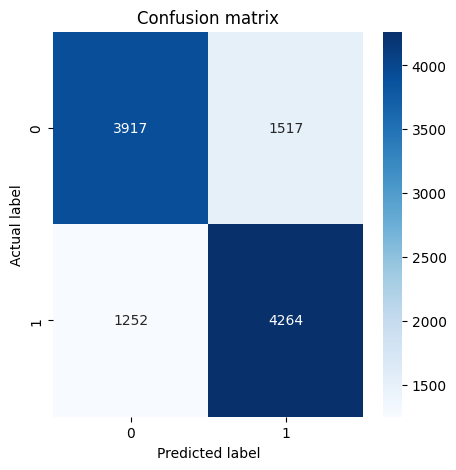

Accuracy: 0.7471232876712329


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
accuracy = runModel(clf)
print("Accuracy: " + str(accuracy))

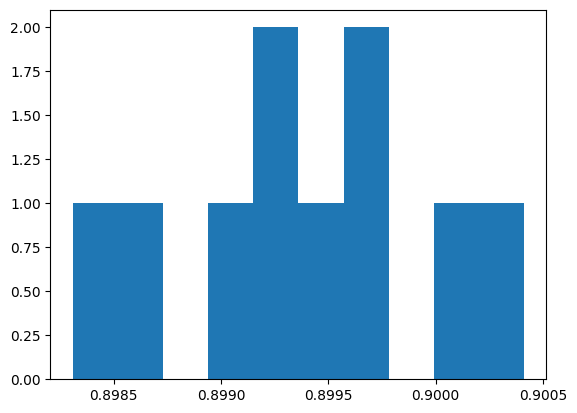

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
runModelRepeatedly(clf)

#### Naive Bayes

Accuracy: 0.716986301369863
Precision: 0.7183745177514046
Recall: 0.716986301369863
F1 score: 0.7166668467512984


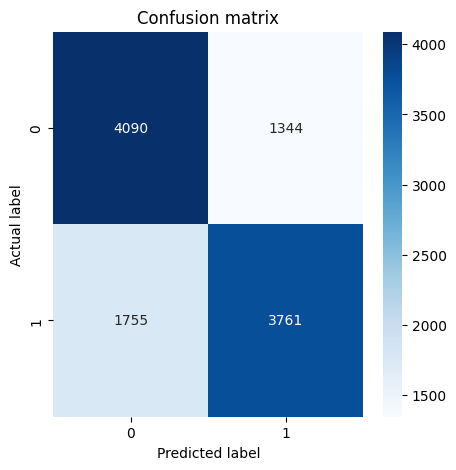

0.716986301369863

In [61]:
# naive bayes
clf = GaussianNB()
runModel(clf)

#### Neural networks

,strategy,accuracy,precision,recall,f1
0,unbalanced,0.913632,0.55296,0.063484,0.113892
1,oversampling,0.742179,0.217815,0.752146,0.337804
2,undersampling,0.755799,0.736912,0.801305,0.767761


Accuracy: 0.7557990867579909
Precision: 0.7369123041013671
Recall: 0.8013052936910805
F1 score: 0.7677609866249783


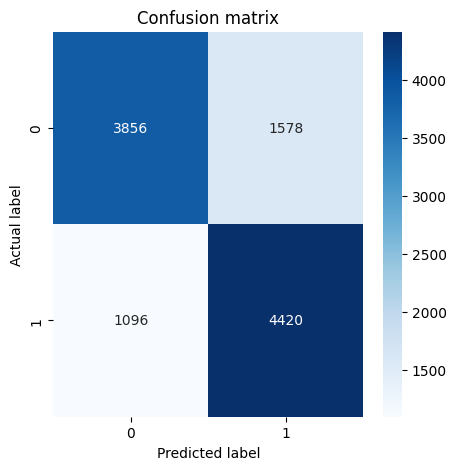

0.7557990867579909

In [171]:
clf = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=42)
runModel(clf)

In [95]:
X, y = balance()

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network classifier
clf = MLPClassifier()

# Define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 5)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500, 1000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

/home/luis/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
